In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import pandas as pd
import matplotlib.pyplot as plt

#from sklearn.model_selection import train_test_split

#dataset_path = r"C:\Users\Dell\Documents\PhD\Semester 3\Pebelejaran Mesin Lanjut\Tugas\boston.csv"
#boston = pd.read_csv(dataset_path)

#boston.head()

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113
)

x_train_df = pd.DataFrame(x_train, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
x_test_df = pd.DataFrame(x_test, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
y_train_df = pd.DataFrame(y_train, columns=['MEDV'])
y_test_df = pd.DataFrame(y_test, columns=['MEDV'])
#y_train_df.head()
#y_train_df.shape

In [2]:
x_train_df['MEDV'] = y_train_df
x_test_df['MEDV'] = y_test_df
#x_train_df.shape

In [3]:
x_train_df['MEDV'].describe()

count    404.000000
mean      22.395050
std        9.210442
min        5.000000
25%       16.675000
50%       20.750000
75%       24.800000
max       50.000000
Name: MEDV, dtype: float64

In [4]:
#x = boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
#y = boston['MEDV']

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(14,)))#,
                               #kernel_regularizer=tf.keras.regularizers.L2()))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64, activation='relu')),
model.add(tf.keras.layers.Dense(512, activation='tanh')),
model.add(tf.keras.layers.Dense(64, activation='relu')),
model.add(tf.keras.layers.Dense(64, activation='relu')),
model.add(tf.keras.layers.Dense(512, activation='sigmoid')),
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                960       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 512)               33280     
                                                                 
 dense_3 (Dense)             (None, 64)                32832     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 512)               33280     
                                                                 
 dense_6 (Dense)             (None, 1)                 5

In [5]:
model.compile(loss='mean_squared_logarithmic_error',
             optimizer='Adam',
             metrics=['mean_squared_logarithmic_error'])

In [6]:
from datetime import datetime
start_time = datetime.now()

history = model.fit(x_train_df, y_train, epochs=200, batch_size=64, validation_split=0.2)
end_time = datetime.now()

history.history

Epoch 1/200
6/6 [==============================] - 2s 51ms/step - loss: 5.3880 - mean_squared_logarithmic_error: 5.3880 - val_loss: 1.9759 - val_mean_squared_logarithmic_error: 1.9759
Epoch 2/200
6/6 [==============================] - 0s 11ms/step - loss: 1.2481 - mean_squared_logarithmic_error: 1.2481 - val_loss: 0.6698 - val_mean_squared_logarithmic_error: 0.6698
Epoch 3/200
6/6 [==============================] - 0s 9ms/step - loss: 0.4628 - mean_squared_logarithmic_error: 0.4628 - val_loss: 0.3469 - val_mean_squared_logarithmic_error: 0.3469
Epoch 4/200
6/6 [==============================] - 0s 9ms/step - loss: 0.2687 - mean_squared_logarithmic_error: 0.2687 - val_loss: 0.2467 - val_mean_squared_logarithmic_error: 0.2467
Epoch 5/200
6/6 [==============================] - 0s 11ms/step - loss: 0.2128 - mean_squared_logarithmic_error: 0.2128 - val_loss: 0.2093 - val_mean_squared_logarithmic_error: 0.2093
Epoch 6/200
6/6 [==============================] - 0s 10ms/step - loss: 0.1907 - m

{'loss': [5.38803768157959,
  1.248118281364441,
  0.4627559781074524,
  0.268706351518631,
  0.21277044713497162,
  0.19066660106182098,
  0.18117688596248627,
  0.17600737512111664,
  0.17304550111293793,
  0.17093892395496368,
  0.16913607716560364,
  0.16747793555259705,
  0.16595396399497986,
  0.16471347212791443,
  0.16372086107730865,
  0.16282615065574646,
  0.16201841831207275,
  0.16126684844493866,
  0.1603393256664276,
  0.1595413237810135,
  0.1587381362915039,
  0.15800660848617554,
  0.15722134709358215,
  0.15632472932338715,
  0.15552979707717896,
  0.1549609899520874,
  0.15451423823833466,
  0.15405569970607758,
  0.15366920828819275,
  0.15331418812274933,
  0.15293245017528534,
  0.15256886184215546,
  0.15224899351596832,
  0.1518854945898056,
  0.15153782069683075,
  0.1511169970035553,
  0.1507669985294342,
  0.15032608807086945,
  0.1499151885509491,
  0.1496017575263977,
  0.14922580122947693,
  0.1487751007080078,
  0.14817920327186584,
  0.14741118252277374

In [7]:
result = model.evaluate(x_test_df, y_test)
print('Loss, Accuracy: ', result)
print('Training Duration: {}'.format(end_time - start_time))

4/4 [==============================] - 0s 10ms/step - loss: 0.0270 - mean_squared_logarithmic_error: 0.0270
Loss, Accuracy:  [0.026961155235767365, 0.026961155235767365]
Training Duration: 0:00:16.211345


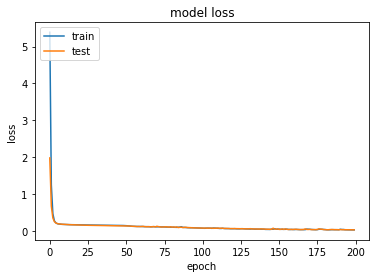

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()